# Figure S5b-f

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

import phate
import matplotlib
import matplotlib.colors as mcolors
import proplot as pplt
import scprep
import scipy
import seaborn
from scipy.stats.stats import pearsonr
from sklearn.decomposition import PCA

pd. set_option('display.max_columns', 60)
pd. set_option('display.max_rows', 1000) 

/var/folders/x8/f_wldy753hb72b1q_11gzz840000gn/T/ipykernel_47655/806410823.py:13: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [ ]:
#Generation of EMD-PHATE and heatmaps in Figure S5b-f
all_data = pd.read_csv('/....../df_gd_all.txt', sep='\t')
all_data.head()

/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3460: DtypeWarning: Columns (51,53) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,pHH3,RFP,Anti-mCherry,Vimentin,B7C23,EpCAM,B7C18,PanCK,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,DNA_1,DNA_2,194_Cisplatin,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,2.112668,1.072871,1.784029,36.151936,0.732375,0.000000,1.565820,2.242769,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,1188.507935,2177.531006,21.608774,5.084100,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,0.527830,0.000000,0.000000,40.617779,0.000000,0.850179,0.000000,2.896378,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,1148.690063,2135.051025,11.153146,0.000000,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,0.000000,0.272097,1.360897,12.533136,0.000000,0.000000,0.000000,2.684406,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,1070.468506,1976.926392,16.781635,0.542236,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,0.000000,0.052713,0.000000,33.661613,0.000000,0.317290,0.000000,0.166774,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,833.138000,1527.750000,15.340094,1.247573,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,0.000000,0.425003,0.033936,72.471931,1.903905,3.386223,0.391445,0.000000,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,972.849915,1659.628662,3.891569,0.850994,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,0.000000,0.000000,30.944431,1.578278,4.320772,0.209392,2.607019,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1601.611450,2732.432861,31.009453,1.381068,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,0.000000,0.000000,0.000000,25.492655,1.366826,0.000000,0.807238,0.000000,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000

In [3]:
pre_data = all_data.drop([

 'RFP',
 'Anti-mCherry',
 'EpCAM',
 'PanCK',
    'DNA_1',
    'DNA_2',
    '194_Cisplatin',
    'Date',
    'Patient',
    'Culture',
    'Transduction',
    'Treatment',
    'Replicate',
    'Time',
    'Cell_type',
    'gd_donor',
    'Batch',    
    
],axis=1, inplace=False)
pre_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,2.112668,36.151936,0.732375,1.565820,0.000000,0.000000,3.449325,15.808734,7.545413,0.484244,1.622991,13.585954,23.493839,10.253730,3.051339,61.927704,6.037919,5.555997,17.510517,3.120044,172.314102,23.197765,0.234269,0.000000,2.445910,33.498081,0.940899,5.350353,7.302702,132.305099,21.675066,0.106663,40.808945,2.020658,2.162645,13.745032,2.528904,2.067870,16.492302,0.000000,7.492941,0.809636,5.084100
1,0.527830,40.617779,0.000000,0.000000,1.821622,0.000000,0.000000,12.363726,94.904320,10.781694,12.443624,60.355770,53.698391,51.307049,1.147771,60.007214,5.578413,22.690882,12.429095,0.000000,249.278717,40.863148,4.385691,0.430424,2.954062,42.227524,2.573740,2.424393,11.418387,211.959457,31.795179,2.262900,14.396840,0.000000,9.581733,2.549168,0.764066,0.512237,10.084972,0.000000,11.921869,0.973840,0.000000
2,0.000000,12.533136,0.000000,0.000000,4.605258,0.000000,0.000000,69.111595,78.055313,0.000000,0.000000,3.013540,54.984116,12.758614,0.905969,0.000000,1.819490,0.000000,5.411917,0.000000,234.678146,9.723784,3.305206,6.483822,4.072320,28.807552,0.386954,2.221904,0.000000,16.533901,83.216873,0.000000,8.262188,1.027620,1.759348,9.905869,0.000000,0.000000,12.013611,12.136374,11.801295,1.850765,0.542236
3,0.000000,33.661613,0.000000,0.000000,1.022511,0.857797,0.000000,12.005932,38.411808,2.619150,0.174478,8.227551,28.066032,20.863403,0.000000,44.467892,0.809206,9.240581,15.271775,1.525572,168.543442,33.865623,0.000000,7.686261,0.000000,38.135387,0.000000,2.225263,0.888110,123.516968,17.426126,0.572136,25.417891,0.000000,2.044804,3.667158,2.677844,0.610078,24.022224,3.468787,16.100355,4.137844,1.247573
4,0.000000,72.471931,1.903905,0.391445,4.443120,0.000000,0.000000,61.478252,99.313812,3.002901,0.677532,10.290436,32.765141,31.240295,0.907393,38.185310,3.654915,26.866573,14.178667,0.000000,174.524155,53.488743,1.074959,2.647377,1.578681,23.625860,0.000000,1.547652,0.906195,150.692383,39.870945,0.000000,35.415035,0.019462,6.027297,6.952862,2.204513,2.269700,8.026061,0.000000,7.649633,9.150639,0.850994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819340,3.357316,30.944431,1.578278,0.209392,1.500951,826.765747,0.000000,16.769331,181.358490,1.952625,28.016953,0.000000,7.833639,20.198891,1.138615,42.455948,7.152562,0.905693,26.804211,12.240554,904.377502,33.007812,3.237805,0.869414,4.508156,25.763971,0.519497,11.010099,24.943974,133.471329,21.747068,0.000000,20.992437,0.000000,13.945458,16.602606,2.728806,19.485020,186.508606,7.385914,4.425802,10.664576,1.381068
5819341,0.000000,25.492655,1.366826,0.807238,0.845823,1.745316,0.000000,43.865810,73.141312,0.422409,5.922387,0.000000,9.262834,46.660622,0.000000,44.193893,14.579997,11.834751,30.874540,2.222952,593.606873,33.942799,0.000000,5.484707,1.107356,41.650654,4.079612,2.890662,16.442080,211.754593,41.139343,0.167057,21.065989,0.932406,52.263050,7.510569,4.690210,4.869834,318.626892,14.122758,0.000000,2.388915,0.000000
5819342,0.000000,24.976599,8.353419,0.000000,0.471833,0.000000,0.000000,20.350275,66.372398,6.817601,2.872206,0.000000,10.188087,13.935201,0.000000,27.215403,0.000000,5.833886,1.988676,0.000000,265.788788,49.861317,4.957391,1.605252,0.000000,29.015533,13.465952,0.000000,7.995706,114.426605,14.433770,0.581513,22.458857,1.111541,3.334839,6.933015,1.609262,11.135314,24.247538,4.874505,0.187084,1.576167,2.325908
5819343,2.175176,31.664440,1.766799,7.169693,2.741029,0.000000,0.000000,46.702705,63.867626,25.045683,5.710142,3091.138916,22.184875,51.588818,0.000000,60.380390,22.572739,18.771585,6.463361,2.874717,327.258179,53.740910,5.749938,13.937111,3.208147,60.760220,0.0000

In [4]:
metadata = all_data.filter(['Date','Patient','Culture','gd_donor','Transduction','Treatment','Replicate','Time','Batch','Cell_type'])
metadata['Batch'] = metadata['Batch'].apply(str)
metadata['gd_donor'] = metadata['gd_donor'].apply(str)
metadata['Patient'] = metadata['Patient'].apply(str)
metadata['Treatment'] = metadata['Treatment'].apply(str)
metadata['Transduction'] = metadata['Transduction'].apply(str)
metadata  

,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
0,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
1,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
2,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
3,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
4,20220608,X,gd,B,eGFP-stIL15,B7C18,A,48,Batch1,gds
...,...,...,...,...,...,...,...,...,...,...
5819340,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819341,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819342,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds
5819343,20230209,X,gd,E,NT,IL15,C,48,Batch9,gds


In [5]:
subset_pre_data = pre_data.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Culture'].isin(['PDOgd'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_pre_data


,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
1044873,1.701709,5.052567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,288.928467,0.000000,7.342087,15.172518,4.541795,28.092117,4.175499,14.877967,0.000000,0.408997,13.905517,0.000000,689.878418,15.232635,2.848083,6.483421,10.964516,15.935392,0.000000,3.437034,0.310556,197.486954,32.241493,0.274466,6.278017,0.000000,0.720309,27.763794,0.000000,0.000000,5.916903,0.000000,2.408237,4.094424,0.000000
1044874,0.000000,13.761417,1.021839,0.000000,0.000000,0.000000,0.000000,24.308214,455.296967,7.931316,22.783447,3.520293,20.856018,29.139305,0.753763,87.106094,0.000000,32.835217,39.345058,72.568169,1116.829346,30.297731,0.000000,0.000000,19.211130,48.350193,3.498754,8.996468,6.788110,428.623810,101.894386,0.000000,15.115031,0.000000,11.708850,44.490444,0.000000,10.028022,214.927139,5.309275,11.624216,22.871342,13.345320
1044875,4.454107,16.284666,0.622486,6.298923,0.000000,0.000000,0.000000,25.686663,260.206177,17.574568,6.696474,19.618029,23.489666,47.049648,0.000000,76.871429,5.433206,5.276527,9.748230,1.408122,880.606567,32.082642,11.254486,11.038741,16.020174,35.385235,4.545930,0.583405,25.705797,405.954926,68.494102,0.000000,26.601055,0.122928,27.610558,18.432610,1.579046,8.697747,146.867889,9.800392,0.237876,7.663266,6.158522
1044876,0.000000,14.865952,3.192981,0.000000,0.000000,0.000000,0.000000,0.302465,71.172935,8.205159,5.120200,20.305111,22.104662,18.574160,0.365186,7.187348,2.743247,9.286388,13.717879,0.000000,467.586548,27.924025,4.263155,0.000000,4.391480,35.635975,0.000000,7.651770,7.643552,185.623825,50.798805,0.081627,35.049419,0.000000,0.000000,8.044600,6.841836,0.266301,54.780453,14.173480,7.410419,12.429025,0.000000
1044877,2.908379,17.551397,0.000000,0.393193,0.000000,5.603742,0.000000,0.000000,46.688911,4.368512,10.980111,26.975033,0.727449,15.833791,6.490859,18.989714,0.000000,9.590254,36.812378,8.380744,531.657410,30.657167,0.000000,13.690708,5.628342,30.528015,0.000000,19.698441,0.000000,200.481049,20.464083,3.123309,15.057275,0.000000,0.000000,10.333478,11.879187,3.642457,38.733170,1.153488,1.152663,14.206959,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,28.875036,0.000000,0.000000,0.000000,1.075896,1.556081,18.458279,110.446426,0.110063,0.000000,1.561231,5.253989,15.427156,0.000000,23.203382,0.781385,7.251719,0.403637,0.706380,391.153107,42.786880,5.704473,1.420541,11.239607,18.273808,0.452530,0.000000,14.336119,134.614746,6.235890,0.000000,2.107930,0.000000,3.945314,5.040523,2.196426,1.767620,19.031973,0.000000,6.412177,0.917294,0.000000
5382523,0.000000,3.801827,1.189538,0.000000,6.091892,0.000000,0.000000,29.470259,220.379868,4.792118,17.330170,8.546122,15.475215,16.007704,0.000000,17.011972,0.000000,16.371639,0.788106,0.023557,508.026337,9.662008,0.000000,0.000000,9.376084,13.658239,0.000000,0.383715,2.928666,278.672150,50.677357,0.087827,10.470968,0.000000,1.934739,12.934807,4.684712,0.000000,16.418653,3.321466,1.956694,7.711249,0.000000
5382524,0.000000,51.180542,0.000000,0.000000,0.000000,4.040262,0.000000,2.260488,91.769936,3.831644,0.000000,36.118465,5.222328,32.752560,0.000000,18.954603,0.000000,6.867979,10.537904,1.168641,307.091980,41.874817,2.923684,3.059006,4.524865,7.214482,0.000000,4.725778,2.936836,118.396957,7.571368,0.089310,39.727184,2.572815,0.642275,4.521135,0.193477,54.202286,14.061462,1.303217,0.562369,0.000000,0.000000
5382525,0.547464,38.701290,0.648193,0.000000,0.000000,0.000000,0.000000,4.264005,118.641479,6.323226,0.000000,14.799616,12.604033,11.217786,0.000000,32.132008,0.000000,6.986883,13.770410,1.540707,420.078522,92.301033,6.741317,17.608

In [6]:
subset_metadata = metadata.loc[(metadata['Patient'].isin(['X','5','11','21','23','27','75','99','109','141','216'])) & (metadata['gd_donor'].isin(['A','B','E','7'])) 
& (metadata['Transduction'].isin(['eGFP-stIL15'])) & (metadata['Treatment'].isin(['BM','B7C18'])) & (metadata['Culture'].isin(['PDOgd'])) & (metadata['Batch'].isin(['Batch2','Batch4','Batch6','Batch7','Batch8']))]
subset_metadata['Batch_donor'] = subset_metadata['gd_donor'] + '_' + subset_metadata['Batch']
subset_metadata

/var/folders/x8/f_wldy753hb72b1q_11gzz840000gn/T/ipykernel_47655/3696149284.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_metadata['Batch_donor'] = subset_metadata['gd_donor'] + '_' + subset_metadata['Batch']


,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Batch_donor
1044873,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,7_Batch2
1044874,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,7_Batch2
1044875,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,7_Batch2
1044876,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,7_Batch2
1044877,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,7_Batch2
...,...,...,...,...,...,...,...,...,...,...,...
5382522,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,E_Batch8
5382523,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,E_Batch8
5382524,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,E_Batch8
5382525,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,E_Batch8


In [7]:
as_data = np.arcsinh(subset_pre_data/5)
as_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
1044873,0.334092,0.888788,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,4.749963,0.000000,1.177116,1.829301,0.815067,2.427026,0.759843,1.810700,0.000000,0.081708,1.746854,0.000000,5.620238,1.833058,0.542597,1.076428,1.526720,1.876002,0.000000,0.642319,0.062071,4.369542,2.562922,0.054866,1.051089,0.000000,0.143568,2.415453,0.000000,0.000000,1.005290,0.000000,0.464737,0.747347,0.000000
1044874,0.000000,1.737058,0.202971,0.000000,0.000000,0.000000,0.0000,2.284937,5.204689,1.241680,2.221572,0.655988,2.135420,2.463078,0.150187,3.551659,0.000000,2.580958,2.760093,3.369420,6.101963,2.501522,0.000000,0.000000,2.055719,2.964842,0.652462,1.350098,1.113101,5.144323,3.708248,0.000000,1.825697,0.000000,1.586807,2.882126,0.000000,1.446139,4.454144,0.924442,1.580139,2.225333,1.708253
1044875,0.802029,1.896709,0.124178,1.053691,0.000000,0.000000,0.0000,2.339022,4.645276,1.969809,1.102184,2.076016,2.251409,2.937724,0.000000,3.426900,0.941331,0.919945,1.420887,0.278029,5.864328,2.558042,1.550522,1.532862,1.881066,2.654958,0.815679,0.116418,2.339753,5.089989,3.311786,0.000000,2.373378,0.024583,2.410007,2.015738,0.310782,1.320701,4.073532,1.425638,0.047557,1.212740,1.036113
1044876,0.000000,1.809934,0.601638,0.000000,0.000000,0.000000,0.0000,0.060456,3.350053,1.270532,0.898271,2.109407,2.192050,2.023123,0.072972,1.159570,0.524297,1.377924,1.734080,0.000000,5.231322,2.421117,0.773241,0.000000,0.792647,2.661951,0.000000,1.211483,1.210584,4.307613,3.013995,0.016325,2.645518,0.000000,0.000000,1.253702,1.119457,0.053235,3.089119,1.764835,1.184784,1.641946,0.000000
1044877,0.553049,1.968541,0.000000,0.078558,0.000000,0.964232,0.0000,0.000000,2.930071,0.789192,1.528013,2.387102,0.144981,1.869901,1.077336,2.044505,0.000000,1.406374,2.694124,1.288664,5.359731,2.513160,0.000000,1.732217,0.967504,2.508994,0.000000,2.079980,0.000000,4.384584,2.116981,0.589857,1.822063,0.000000,0.000000,1.473071,1.600105,0.675851,2.744546,0.228699,0.228538,1.767060,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,0.000000,2.454100,0.000000,0.000000,0.000000,0.213552,0.3064,2.017081,3.788752,0.022011,0.000000,0.307383,0.916841,1.845122,0.000000,2.239419,0.155648,1.166899,0.080640,0.140810,5.052849,2.843337,0.977578,0.280419,1.549313,2.007390,0.090383,0.000000,1.775601,3.986471,1.045829,0.000000,0.410002,0.000000,0.724105,0.887093,0.426259,0.346546,2.046654,0.000000,1.067696,0.182445,0.000000
5382523,0.000000,0.701419,0.235719,0.000000,1.027686,0.000000,0.0000,2.474211,4.479191,0.851667,1.956347,1.305488,1.848081,1.880323,0.000000,1.938555,0.000000,1.901802,0.156976,0.004711,5.314267,1.412989,0.000000,0.000000,1.386396,1.729987,0.000000,0.076668,0.556553,4.713826,3.011613,0.017565,1.484984,0.000000,0.377890,1.679052,0.836075,0.000000,1.904545,0.623169,0.381982,1.217973,0.000000
5382524,0.000000,3.021446,0.000000,0.000000,0.000000,0.738944,0.0000,0.437962,3.603735,0.706159,0.000000,2.675270,0.912469,2.578466,0.000000,2.042715,0.000000,1.122538,1.490737,0.231651,4.810923,2.821939,0.555693,0.578918,0.812559,1.162665,0.000000,0.842056,0.557962,3.858198,1.202655,0.017861,2.769682,0.494199,0.128104,0.812006,0.038686,3.078553,1.757355,0.257779,0.112238,0.000000,0.000000
5382525,0.109275,2.743729,0.129278,0.000000,0.000000,0.000000,0.0000,0.773370,3.860259,1.056709,0.000000,1.805696,1.654931,1.547538,0.000000,2.559561,0.000000,1.136456,1.737672,0.303462,5.124186,3.609497,1.107538,1.971640,0.371901,1.644925,0.242105,0.976251,1.619874,4.138278,1.632543,0.000000,0.000000,0.157120,0.814651,1.389471,0.000000,2.067664,2.437632,0.378945,0.000000,0.280705,0.000000


In [8]:
as_data_centered = scprep.normalize.batch_mean_center(as_data,sample_idx=subset_metadata['Batch_donor'])
as_data_centered

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
1044873,0.216698,-1.120696,-0.190023,-0.145009,-0.458153,-0.915942,-0.088078,-1.724162,0.396883,-1.021091,0.063642,0.173025,-1.053753,0.291833,0.335070,-0.530721,-0.575332,-1.040582,0.211860,-1.135521,0.150164,-0.328431,0.030972,0.387304,0.369234,-0.430799,-0.213280,-0.373898,-0.877062,-0.177944,-0.508459,-0.227618,-0.527233,-0.198319,-0.922990,0.474905,-0.958952,-0.808357,-2.072281,-0.789340,-0.477835,-0.754638,-0.310499
1044874,-0.117394,-0.272426,0.012948,-0.145009,-0.458153,-0.915942,-0.088078,0.560775,0.851609,0.220589,1.108098,-1.000288,0.266600,0.327885,-0.274585,1.210238,-0.575332,1.458668,1.225098,2.233899,0.631890,0.340034,-0.511625,-0.689124,0.898233,0.658041,0.439182,0.333881,0.173968,0.596837,0.636866,-0.282483,0.247375,-0.198319,0.520249,0.941578,-0.958952,0.637782,1.376573,0.135102,0.637568,0.723348,1.397754
1044875,0.684635,-0.112775,-0.065845,0.908682,-0.458153,-0.915942,-0.088078,0.614860,0.292195,0.948719,-0.011290,0.419740,0.382589,0.802531,-0.424772,1.085479,0.365999,-0.202345,-0.114107,-0.857493,0.394255,0.396554,1.038897,0.843738,0.723580,0.348157,0.602399,-0.899799,1.400620,0.542503,0.240405,-0.282483,0.795056,-0.173736,1.343448,0.075190,-0.648170,0.512344,0.995961,0.636298,-0.895014,-0.289245,0.725613
1044876,-0.117394,-0.199549,0.411615,-0.145009,-0.458153,-0.915942,-0.088078,-1.663706,-1.003027,0.249441,-0.215203,0.453131,0.323230,-0.112070,-0.351800,-1.181851,-0.051035,0.255633,0.199086,-1.135521,-0.238751,0.259629,0.261615,-0.689124,-0.364839,0.355149,-0.213280,0.195267,0.271451,-0.239873,-0.057386,-0.266159,1.067196,-0.198319,-1.066558,-0.686846,0.160505,-0.755122,0.011548,0.975495,0.242212,0.139961,-0.310499
1044877,0.435654,-0.040943,-0.190023,-0.066451,-0.458153,0.048290,-0.088078,-1.724162,-1.423010,-0.231899,0.414539,0.730826,-1.723839,-0.265292,0.652564,-0.296916,-0.575332,0.284084,1.159130,0.153143,-0.110343,0.351672,-0.511625,1.043094,-0.189983,0.202193,-0.213280,1.063763,-0.939133,-0.162902,-0.954400,0.307374,0.243741,-0.198319,-1.066558,-0.467477,0.641153,-0.132505,-0.333025,-0.560641,-0.714034,0.265075,-0.310499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.141981,-0.139834,-0.249244,-0.164629,-0.617704,-0.904424,0.137247,-0.250839,-0.403202,-0.981168,-1.162084,-1.177569,-0.493002,-0.517871,-0.186374,-0.300610,-0.294102,-0.115443,-1.293015,-0.674894,-0.180161,0.006623,0.243573,-0.455393,0.488563,0.001745,-0.164340,-0.712633,0.680628,-0.388603,-0.850912,-0.255110,-0.832868,-0.160842,-0.421312,-0.731026,-0.428480,-1.035367,-0.982616,-0.629478,0.606828,-0.433714,-0.171062
5382523,-0.141981,-1.892515,-0.013525,-0.164629,0.409982,-1.117976,-0.169152,0.206290,0.287237,-0.151512,0.794263,-0.179464,0.438238,-0.482669,-0.186374,-0.601475,-0.449750,0.619460,-1.216679,-0.810993,0.081257,-1.423725,-0.734005,-0.735812,0.325646,-0.275657,-0.254723,-0.635966,-0.538420,0.338752,1.114873,-0.237545,0.242114,-0.160842,-0.767527,0.060933,-0.018664,-1.381913,-1.124725,-0.006309,-0.078886,0.601814,-0.171062
5382524,-0.141981,0.427513,-0.249244,-0.164629,-0.617704,-0.379032,-0.169152,-1.829959,-0.588218,-0.297020,-1.162084,1.190319,-0.497375,0.215474,-0.186374,-0.497314,-0.449750,-0.159804,0.117083,-0.584054,-0.422087,-0.014775,-0.178312,-0.156894,-0.248191,-0.842980,-0.254723,0.129423,-0.537011,-0.516876,-0.694086,-0.237249,1.526812,0.333357,-1.017313,-0.806113,-0.816053,1.696640,-1.271915,-0.371699,-0.348630,-0.616159,-0.171062
5382525,-0.032706,0.149796,-0.119966,-0.164629,-0.617704,-1.117976,-0.169152,-1.494550,-0.331694,0.053530,-1.162084,0.320745,0.245088,-0.815454,-0.186374,0.019532,-0.44975

In [9]:
data_as_meta = pd.concat([as_data_centered, subset_metadata], axis=1).drop(['Batch_donor'], axis=1, inplace=False)
data_as_meta

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type
1044873,0.216698,-1.120696,-0.190023,-0.145009,-0.458153,-0.915942,-0.088078,-1.724162,0.396883,-1.021091,0.063642,0.173025,-1.053753,0.291833,0.335070,-0.530721,-0.575332,-1.040582,0.211860,-1.135521,0.150164,-0.328431,0.030972,0.387304,0.369234,-0.430799,-0.213280,-0.373898,-0.877062,-0.177944,-0.508459,-0.227618,-0.527233,-0.198319,-0.922990,0.474905,-0.958952,-0.808357,-2.072281,-0.789340,-0.477835,-0.754638,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
1044874,-0.117394,-0.272426,0.012948,-0.145009,-0.458153,-0.915942,-0.088078,0.560775,0.851609,0.220589,1.108098,-1.000288,0.266600,0.327885,-0.274585,1.210238,-0.575332,1.458668,1.225098,2.233899,0.631890,0.340034,-0.511625,-0.689124,0.898233,0.658041,0.439182,0.333881,0.173968,0.596837,0.636866,-0.282483,0.247375,-0.198319,0.520249,0.941578,-0.958952,0.637782,1.376573,0.135102,0.637568,0.723348,1.397754,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
1044875,0.684635,-0.112775,-0.065845,0.908682,-0.458153,-0.915942,-0.088078,0.614860,0.292195,0.948719,-0.011290,0.419740,0.382589,0.802531,-0.424772,1.085479,0.365999,-0.202345,-0.114107,-0.857493,0.394255,0.396554,1.038897,0.843738,0.723580,0.348157,0.602399,-0.899799,1.400620,0.542503,0.240405,-0.282483,0.795056,-0.173736,1.343448,0.075190,-0.648170,0.512344,0.995961,0.636298,-0.895014,-0.289245,0.725613,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
1044876,-0.117394,-0.199549,0.411615,-0.145009,-0.458153,-0.915942,-0.088078,-1.663706,-1.003027,0.249441,-0.215203,0.453131,0.323230,-0.112070,-0.351800,-1.181851,-0.051035,0.255633,0.199086,-1.135521,-0.238751,0.259629,0.261615,-0.689124,-0.364839,0.355149,-0.213280,0.195267,0.271451,-0.239873,-0.057386,-0.266159,1.067196,-0.198319,-1.066558,-0.686846,0.160505,-0.755122,0.011548,0.975495,0.242212,0.139961,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
1044877,0.435654,-0.040943,-0.190023,-0.066451,-0.458153,0.048290,-0.088078,-1.724162,-1.423010,-0.231899,0.414539,0.730826,-1.723839,-0.265292,0.652564,-0.296916,-0.575332,0.284084,1.159130,0.153143,-0.110343,0.351672,-0.511625,1.043094,-0.189983,0.202193,-0.213280,1.063763,-0.939133,-0.162902,-0.954400,0.307374,0.243741,-0.198319,-1.066558,-0.467477,0.641153,-0.132505,-0.333025,-0.560641,-0.714034,0.265075,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5382522,-0.141981,-0.139834,-0.249244,-0.164629,-0.617704,-0.904424,0.137247,-0.250839,-0.403202,-0.981168,-1.162084,-1.177569,-0.493002,-0.517871,-0.186374,-0.300610,-0.294102,-0.115443,-1.293015,-0.674894,-0.180161,0.006623,0.243573,-0.455393,0.488563,0.001745,-0.164340,-0.712633,0.680628,-0.388603,-0.850912,-0.255110,-0.832868,-0.160842,-0.421312,-0.731026,-0.428480,-1.035367,-0.982616,-0.629478,0.606828,-0.433714,-0.171062,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382523,-0.141981,-1.892515,-0.013525,-0.164629,0.409982,-1.117976,-0.169152,0.206290,0.287237,-0.151512,0.794263,-0.179464,0.438238,-0.482669,-0.186374,-0.601475,-0.449750,0.619460,-1.216679,-0.810993,0.081257,-1.423725,-0.734005,-0.735812,0.325646,-0.275657,-0.254723,-0.635966,-0.538420,0.338752,1.114873,-0.237545,0.242114,-0.160842,-0.767527,0.060933,-0.018664,-1.381913,-1.124725,-0.006309,-0.078886,0.601814,-0.171062,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds
5382524,-0.141981,0.427513,-0.249244,-0.164629,-0.617704,-0.379032,-0.169152,-1.829959,-0.588218,-0.297

In [10]:
data_as_meta.index = np.arange (data_as_meta.shape[0])
data_as_meta['Date'] = data_as_meta['Date'].apply(str)
data_as_meta['Patient'] = data_as_meta['Patient'].apply(str)
data_as_meta['Culture'] = data_as_meta['Culture'].apply(str)
data_as_meta['gd_donor'] = data_as_meta['gd_donor'].apply(str)
data_as_meta['Transduction'] = data_as_meta['Transduction'].apply(str)
data_as_meta['Treatment'] = data_as_meta['Treatment'].apply(str)
data_as_meta['Replicate'] = data_as_meta['Replicate'].apply(str)
data_as_meta['Time'] = data_as_meta['Time'].apply(str)
data_as_meta['Batch'] = data_as_meta['Batch'].apply(str)

In [11]:
full_data = data_as_meta
full_data['Condition'] = full_data['Patient'] + '_' + full_data['Culture'] + '_' + full_data['gd_donor'] + '_' + full_data['Transduction'] + '_' + full_data['Treatment'] + '_' + full_data['Batch'] + '_' + full_data['Date'] + '_' + full_data['Replicate']
grouped = full_data.groupby(
    [
        "Condition"
    ]
, as_index=False).mean()

full_data.index = np.arange (full_data.shape[0])
condition_list = pd.unique(full_data['Condition'].tolist())
full_data

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Date,Patient,Culture,gd_donor,Transduction,Treatment,Replicate,Time,Batch,Cell_type,Condition
0,0.216698,-1.120696,-0.190023,-0.145009,-0.458153,-0.915942,-0.088078,-1.724162,0.396883,-1.021091,0.063642,0.173025,-1.053753,0.291833,0.335070,-0.530721,-0.575332,-1.040582,0.211860,-1.135521,0.150164,-0.328431,0.030972,0.387304,0.369234,-0.430799,-0.213280,-0.373898,-0.877062,-0.177944,-0.508459,-0.227618,-0.527233,-0.198319,-0.922990,0.474905,-0.958952,-0.808357,-2.072281,-0.789340,-0.477835,-0.754638,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
1,-0.117394,-0.272426,0.012948,-0.145009,-0.458153,-0.915942,-0.088078,0.560775,0.851609,0.220589,1.108098,-1.000288,0.266600,0.327885,-0.274585,1.210238,-0.575332,1.458668,1.225098,2.233899,0.631890,0.340034,-0.511625,-0.689124,0.898233,0.658041,0.439182,0.333881,0.173968,0.596837,0.636866,-0.282483,0.247375,-0.198319,0.520249,0.941578,-0.958952,0.637782,1.376573,0.135102,0.637568,0.723348,1.397754,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
2,0.684635,-0.112775,-0.065845,0.908682,-0.458153,-0.915942,-0.088078,0.614860,0.292195,0.948719,-0.011290,0.419740,0.382589,0.802531,-0.424772,1.085479,0.365999,-0.202345,-0.114107,-0.857493,0.394255,0.396554,1.038897,0.843738,0.723580,0.348157,0.602399,-0.899799,1.400620,0.542503,0.240405,-0.282483,0.795056,-0.173736,1.343448,0.075190,-0.648170,0.512344,0.995961,0.636298,-0.895014,-0.289245,0.725613,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
3,-0.117394,-0.199549,0.411615,-0.145009,-0.458153,-0.915942,-0.088078,-1.663706,-1.003027,0.249441,-0.215203,0.453131,0.323230,-0.112070,-0.351800,-1.181851,-0.051035,0.255633,0.199086,-1.135521,-0.238751,0.259629,0.261615,-0.689124,-0.364839,0.355149,-0.213280,0.195267,0.271451,-0.239873,-0.057386,-0.266159,1.067196,-0.198319,-1.066558,-0.686846,0.160505,-0.755122,0.011548,0.975495,0.242212,0.139961,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
4,0.435654,-0.040943,-0.190023,-0.066451,-0.458153,0.048290,-0.088078,-1.724162,-1.423010,-0.231899,0.414539,0.730826,-1.723839,-0.265292,0.652564,-0.296916,-0.575332,0.284084,1.159130,0.153143,-0.110343,0.351672,-0.511625,1.043094,-0.189983,0.202193,-0.213280,1.063763,-0.939133,-0.162902,-0.954400,0.307374,0.243741,-0.198319,-1.066558,-0.467477,0.641153,-0.132505,-0.333025,-0.560641,-0.714034,0.265075,-0.310499,20220614,27,PDOgd,7,eGFP-stIL15,B7C18,A,48,Batch2,gds,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681583,-0.141981,-0.139834,-0.249244,-0.164629,-0.617704,-0.904424,0.137247,-0.250839,-0.403202,-0.981168,-1.162084,-1.177569,-0.493002,-0.517871,-0.186374,-0.300610,-0.294102,-0.115443,-1.293015,-0.674894,-0.180161,0.006623,0.243573,-0.455393,0.488563,0.001745,-0.164340,-0.712633,0.680628,-0.388603,-0.850912,-0.255110,-0.832868,-0.160842,-0.421312,-0.731026,-0.428480,-1.035367,-0.982616,-0.629478,0.606828,-0.433714,-0.171062,20230201,141,PDOgd,E,eGFP-stIL15,BM,C,48,Batch8,gds,141_PDOgd_E_eGFP-stIL15_BM_Batch8_20230201_C
2681584,-0.141981,-1.892515,-0.013525,-0.164629,0.409982,-1.117976,-0.169152,0.206290,0.287237,-0.151512,0.794263,-0.179464,0.438238,-0.482669,-0.186374,-0.601475,-0.449750,0.619460,-1.216679,-0.810993,0.081257,-1.423725,-0.734005,-0.735812,0.325646,-0.275657,-0.254723,-0.635966,-0.538420,0.338752,1.114873,-0.23754

In [12]:
#Define control for pairwise EMD. All co-cultures are compared to their respective untreated co-culture control (BM)
full_data["Control"] =  full_data["Patient"] + '_' + full_data["Culture"] + '_' + full_data["gd_donor"] + '_' + full_data["Transduction"] + '_BM_' +  full_data["Batch"] + '_' + full_data['Date']


In [13]:
no_metadata = full_data.drop(
['Date',
 'Patient',
 'Culture',
 'gd_donor',
 'Transduction',
 'Treatment',
 'Replicate',
 'Time',
 'Batch',
 'Cell_type',
 'Control',
'Condition',
], axis=1, inplace=False)
no_metadata

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
0,0.216698,-1.120696,-0.190023,-0.145009,-0.458153,-0.915942,-0.088078,-1.724162,0.396883,-1.021091,0.063642,0.173025,-1.053753,0.291833,0.335070,-0.530721,-0.575332,-1.040582,0.211860,-1.135521,0.150164,-0.328431,0.030972,0.387304,0.369234,-0.430799,-0.213280,-0.373898,-0.877062,-0.177944,-0.508459,-0.227618,-0.527233,-0.198319,-0.922990,0.474905,-0.958952,-0.808357,-2.072281,-0.789340,-0.477835,-0.754638,-0.310499
1,-0.117394,-0.272426,0.012948,-0.145009,-0.458153,-0.915942,-0.088078,0.560775,0.851609,0.220589,1.108098,-1.000288,0.266600,0.327885,-0.274585,1.210238,-0.575332,1.458668,1.225098,2.233899,0.631890,0.340034,-0.511625,-0.689124,0.898233,0.658041,0.439182,0.333881,0.173968,0.596837,0.636866,-0.282483,0.247375,-0.198319,0.520249,0.941578,-0.958952,0.637782,1.376573,0.135102,0.637568,0.723348,1.397754
2,0.684635,-0.112775,-0.065845,0.908682,-0.458153,-0.915942,-0.088078,0.614860,0.292195,0.948719,-0.011290,0.419740,0.382589,0.802531,-0.424772,1.085479,0.365999,-0.202345,-0.114107,-0.857493,0.394255,0.396554,1.038897,0.843738,0.723580,0.348157,0.602399,-0.899799,1.400620,0.542503,0.240405,-0.282483,0.795056,-0.173736,1.343448,0.075190,-0.648170,0.512344,0.995961,0.636298,-0.895014,-0.289245,0.725613
3,-0.117394,-0.199549,0.411615,-0.145009,-0.458153,-0.915942,-0.088078,-1.663706,-1.003027,0.249441,-0.215203,0.453131,0.323230,-0.112070,-0.351800,-1.181851,-0.051035,0.255633,0.199086,-1.135521,-0.238751,0.259629,0.261615,-0.689124,-0.364839,0.355149,-0.213280,0.195267,0.271451,-0.239873,-0.057386,-0.266159,1.067196,-0.198319,-1.066558,-0.686846,0.160505,-0.755122,0.011548,0.975495,0.242212,0.139961,-0.310499
4,0.435654,-0.040943,-0.190023,-0.066451,-0.458153,0.048290,-0.088078,-1.724162,-1.423010,-0.231899,0.414539,0.730826,-1.723839,-0.265292,0.652564,-0.296916,-0.575332,0.284084,1.159130,0.153143,-0.110343,0.351672,-0.511625,1.043094,-0.189983,0.202193,-0.213280,1.063763,-0.939133,-0.162902,-0.954400,0.307374,0.243741,-0.198319,-1.066558,-0.467477,0.641153,-0.132505,-0.333025,-0.560641,-0.714034,0.265075,-0.310499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2681583,-0.141981,-0.139834,-0.249244,-0.164629,-0.617704,-0.904424,0.137247,-0.250839,-0.403202,-0.981168,-1.162084,-1.177569,-0.493002,-0.517871,-0.186374,-0.300610,-0.294102,-0.115443,-1.293015,-0.674894,-0.180161,0.006623,0.243573,-0.455393,0.488563,0.001745,-0.164340,-0.712633,0.680628,-0.388603,-0.850912,-0.255110,-0.832868,-0.160842,-0.421312,-0.731026,-0.428480,-1.035367,-0.982616,-0.629478,0.606828,-0.433714,-0.171062
2681584,-0.141981,-1.892515,-0.013525,-0.164629,0.409982,-1.117976,-0.169152,0.206290,0.287237,-0.151512,0.794263,-0.179464,0.438238,-0.482669,-0.186374,-0.601475,-0.449750,0.619460,-1.216679,-0.810993,0.081257,-1.423725,-0.734005,-0.735812,0.325646,-0.275657,-0.254723,-0.635966,-0.538420,0.338752,1.114873,-0.237545,0.242114,-0.160842,-0.767527,0.060933,-0.018664,-1.381913,-1.124725,-0.006309,-0.078886,0.601814,-0.171062
2681585,-0.141981,0.427513,-0.249244,-0.164629,-0.617704,-0.379032,-0.169152,-1.829959,-0.588218,-0.297020,-1.162084,1.190319,-0.497375,0.215474,-0.186374,-0.497314,-0.449750,-0.159804,0.117083,-0.584054,-0.422087,-0.014775,-0.178312,-0.156894,-0.248191,-0.842980,-0.254723,0.129423,-0.537011,-0.516876,-0.694086,-0.237249,1.526812,0.333357,-1.017313,-0.806113,-0.816053,1.696640,-1.271915,-0.371699,-0.348630,-0.616159,-0.171062
2681586,-0.032706,0.149796,-0.119966,-0.164629,-0.617704,-1.117976,-0.169152,-1.494550,-0.331694,0.053530,-1.162084,0.320745,0.245088,-0.815454,-0.186374,0.019532,-0.449750,-0.145886,0.364017,-0.512242

In [14]:
marker_list = list(no_metadata.columns.values)

In [15]:
condition_list

array(['27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A',
       '27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_B',
       '27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_C',
       '27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_A',
       '27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_B',
       '27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_C',
       '27_PDOgd_A_eGFP-stIL15_B7C18_Batch2_20220614_A',
       '27_PDOgd_A_eGFP-stIL15_B7C18_Batch2_20220614_B',
       '27_PDOgd_A_eGFP-stIL15_B7C18_Batch2_20220614_C',
       '27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614_A',
       '27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614_B',
       '27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614_C',
       '27_PDOgd_B_eGFP-stIL15_B7C18_Batch2_20220614_A',
       '27_PDOgd_B_eGFP-stIL15_B7C18_Batch2_20220614_B',
       '27_PDOgd_B_eGFP-stIL15_B7C18_Batch2_20220614_C',
       '27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614_A',
       '27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614_B',
       '27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614_C',
 

In [16]:
coculture_emds = pd.DataFrame(
    np.full((len(condition_list), len(marker_list)), np.nan),
    columns=marker_list,
    index=condition_list)

In [17]:
control_list = pd.unique(full_data['Control'].tolist())

In [18]:
 for condition in condition_list:
    each_line = full_data.loc[(full_data["Condition"] == condition)]
    control_line = each_line['Control']
    print(control_line.values[0])
    control_df = full_data.loc[full_data["Condition"].str.startswith(control_line.values[0])]
    for marker in marker_list:
                    sign = np.sign(each_line[marker].median() - control_df[marker].median())
                    if sign == 0:
                        sign = np.sign(each_line[marker].mean() - control_df[marker].mean())
                    signed_emd = sign*scprep.stats.EMD(
                        each_line[marker], control_df[marker]
            )
                    coculture_emds.loc[condition, marker] = signed_emd

assert not coculture_emds.isna().values.any()

27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_A_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_B_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_20220614
27_PDOgd_E_eGFP-stIL15_BM_Batch2_2

In [19]:
coculture_emds.head()

,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44
27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,-0.003090,-0.057416,-0.008200,-0.010157,-0.004018,0.080230,-0.005346,0.019988,0.037144,0.025926,0.096506,0.101152,0.016335,0.032138,0.009854,-0.029321,0.015997,0.017259,-0.049095,0.023673,0.022327,-0.025507,0.014856,-0.023328,0.028682,0.021893,0.008446,0.007363,0.019847,0.014905,0.023419,0.008022,0.016226,0.002763,0.046992,0.014909,-0.007363,0.024699,0.149295,0.039618,0.013645,-0.038088,0.014231
27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,-0.005020,-0.048286,-0.014576,-0.012318,0.012827,0.051688,-0.004612,0.049882,0.083275,0.048350,-0.028910,-0.086323,0.070722,0.024832,0.051670,-0.045903,0.031251,0.019234,-0.070868,-0.023922,0.020687,-0.049206,0.007352,-0.018010,0.064452,0.075097,-0.005039,-0.005937,0.015644,0.026888,0.072622,0.004698,-0.037577,-0.004224,0.030535,-0.021630,0.007380,-0.053847,0.140920,0.051886,0.024267,0.110172,0.013731
27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,0.003139,-0.085594,-0.015568,-0.009866,-0.003395,0.072598,-0.007849,0.060971,0.110967,0.060714,0.109392,0.133525,0.091535,0.056490,0.049138,-0.081132,0.031211,0.029418,-0.061078,0.069667,0.052002,-0.056688,0.021299,0.010666,0.087666,0.069890,0.009462,-0.011589,0.041606,0.030258,0.070485,0.002121,0.038525,0.002730,0.045764,0.022378,0.037522,-0.043837,0.129111,0.048047,0.020376,0.085165,0.013247
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_A,0.002119,0.019378,-0.002063,0.001671,0.003951,-0.031333,-0.001542,-0.012004,-0.047435,-0.020598,-0.072825,-0.108729,-0.013170,-0.027551,-0.011997,0.019929,-0.004864,-0.012502,-0.014016,-0.063966,-0.034745,0.008368,-0.003261,-0.009844,-0.036160,-0.010381,-0.004235,-0.006228,-0.032199,-0.011866,-0.008390,-0.001363,-0.023556,-0.001822,-0.032066,-0.030137,-0.025305,-0.017388,-0.044851,-0.009013,0.003793,0.024059,-0.014321
27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.004530,0.016278,0.005369,0.001422,-0.005266,-0.011606,0.003355,-0.012276,-0.008856,-0.012004,0.011348,0.021895,-0.032105,-0.004394,-0.019257,0.006919,-0.004849,-0.009686,-0.030203,-0.007469,-0.011449,-0.010432,-0.007973,-0.008564,-0.005364,-0.032232,-0.002444,-0.003573,-0.005521,-0.008663,-0.024821,-0.002908,-0.013648,-0.002297,-0.018481,0.003954,-0.008176,-0.011398,-0.017673,-0.009891,-0.012546,-0.062457,0.006979


In [20]:
cocul_emd_df = coculture_emds.reset_index()
cocul_emd_df[['Patient', 'Culture','gd_donor', 'Transduction', 'Treatment','Batch','Date', 'Replicate']] = cocul_emd_df['index'].str.split('_', expand=True)
cocul_emd_df.head()

,index,pHH3,Vimentin,B7C23,B7C18,GFP,IdU,Trail,cCaspase3,CD45,pSTAT5,pZAP_Syk,pSLP76,pBTK,pSRC,PDL1,pRB,pNDRG1,pAKT,TIGIT,CD56,CD3,pNFkB,TIM-3,CD27,CD69,pAMPKa,PD1,pH2AX,DNAM-1,p120-catenin,Beta-catenin,NKp30,pERK,Fas-L,pSTAT3,gdTCR,LAG-3,CD16,GranzymeB,cPARP,Perforin,CyclinB1,NKp44,Patient,Culture,gd_donor,Transduction,Treatment,Batch,Date,Replicate
0,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_A,-0.003090,-0.057416,-0.008200,-0.010157,-0.004018,0.080230,-0.005346,0.019988,0.037144,0.025926,0.096506,0.101152,0.016335,0.032138,0.009854,-0.029321,0.015997,0.017259,-0.049095,0.023673,0.022327,-0.025507,0.014856,-0.023328,0.028682,0.021893,0.008446,0.007363,0.019847,0.014905,0.023419,0.008022,0.016226,0.002763,0.046992,0.014909,-0.007363,0.024699,0.149295,0.039618,0.013645,-0.038088,0.014231,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,A
1,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_B,-0.005020,-0.048286,-0.014576,-0.012318,0.012827,0.051688,-0.004612,0.049882,0.083275,0.048350,-0.028910,-0.086323,0.070722,0.024832,0.051670,-0.045903,0.031251,0.019234,-0.070868,-0.023922,0.020687,-0.049206,0.007352,-0.018010,0.064452,0.075097,-0.005039,-0.005937,0.015644,0.026888,0.072622,0.004698,-0.037577,-0.004224,0.030535,-0.021630,0.007380,-0.053847,0.140920,0.051886,0.024267,0.110172,0.013731,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,B
2,27_PDOgd_7_eGFP-stIL15_B7C18_Batch2_20220614_C,0.003139,-0.085594,-0.015568,-0.009866,-0.003395,0.072598,-0.007849,0.060971,0.110967,0.060714,0.109392,0.133525,0.091535,0.056490,0.049138,-0.081132,0.031211,0.029418,-0.061078,0.069667,0.052002,-0.056688,0.021299,0.010666,0.087666,0.069890,0.009462,-0.011589,0.041606,0.030258,0.070485,0.002121,0.038525,0.002730,0.045764,0.022378,0.037522,-0.043837,0.129111,0.048047,0.020376,0.085165,0.013247,27,PDOgd,7,eGFP-stIL15,B7C18,Batch2,20220614,C
3,27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_A,0.002119,0.019378,-0.002063,0.001671,0.003951,-0.031333,-0.001542,-0.012004,-0.047435,-0.020598,-0.072825,-0.108729,-0.013170,-0.027551,-0.011997,0.019929,-0.004864,-0.012502,-0.014016,-0.063966,-0.034745,0.008368,-0.003261,-0.009844,-0.036160,-0.010381,-0.004235,-0.006228,-0.032199,-0.011866,-0.008390,-0.001363,-0.023556,-0.001822,-0.032066,-0.030137,-0.025305,-0.017388,-0.044851,-0.009013,0.003793,0.024059,-0.014321,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,A
4,27_PDOgd_7_eGFP-stIL15_BM_Batch2_20220614_B,-0.004530,0.016278,0.005369,0.001422,-0.005266,-0.011606,0.003355,-0.012276,-0.008856,-0.012004,0.011348,0.021895,-0.032105,-0.004394,-0.019257,0.006919,-0.004849,-0.009686,-0.030203,-0.007469,-0.011449,-0.010432,-0.007973,-0.008564,-0.005364,-0.032232,-0.002444,-0.003573,-0.005521,-0.008663,-0.024821,-0.002908,-0.013648,-0.002297,-0.018481,0.003954,-0.008176,-0.011398,-0.017673,-0.009891,-0.012546,-0.062457,0.006979,27,PDOgd,7,eGFP-stIL15,BM,Batch2,20220614,B


In [21]:
cocul_meta = cocul_emd_df.drop(['index'],axis=1, inplace=False)
cocul_meta.set_index(['Patient','Culture','gd_donor','Transduction', 'Treatment','Batch','Date', 'Replicate'], inplace=True)
cocul_meta.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.003090   
                                                                B         -0.005020   
                                                                C          0.003139   
                                      BM        Batch2 20220614 A          0.002119   
                                                                B         -0.004530   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.057416   
                                                                B         -0.048286   
                                                                C         -0.085594   
                                      BM        Batch2 20220614 A          0.019378   
                                                                B          0.016278   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.008200   
                                                                B         -0.014576   
                                                                C         -0.015568   
                                      BM        Batch2 20220614 A         -0.002063   
                                                                B          0.005369   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.010157   
                                                                B         -0.012318   
                                                                C         -0.009866   
                                      BM        Batch2 20220614 A          0.001671   
                                                                B          0.001422   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.004018   
                                                                B          0.012827   
                                                                C         -0.003395   
                                      BM        Batch2 20220614 A          0.003951   
                                                                B         -0.005266   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.080230   
                                                                B          0.051688   
                                                                C          0.072598   
                                      BM        Batch2 20220614 A         -0.031333   
                                                                B         -0.011606   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005346   
                                                                B         -0.004612   
                                                                C      

In [22]:
data = cocul_meta.drop([    
 'pAMPKa',
    ],axis=1, inplace=False)
data.head()

pHH3  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.003090   
                                                                B         -0.005020   
                                                                C          0.003139   
                                      BM        Batch2 20220614 A          0.002119   
                                                                B         -0.004530   

                                                                           Vimentin  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.057416   
                                                                B         -0.048286   
                                                                C         -0.085594   
                                      BM        Batch2 20220614 A          0.019378   
                                                                B          0.016278   

                                                                              B7C23  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.008200   
                                                                B         -0.014576   
                                                                C         -0.015568   
                                      BM        Batch2 20220614 A         -0.002063   
                                                                B          0.005369   

                                                                              B7C18  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.010157   
                                                                B         -0.012318   
                                                                C         -0.009866   
                                      BM        Batch2 20220614 A          0.001671   
                                                                B          0.001422   

                                                                                GFP  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.004018   
                                                                B          0.012827   
                                                                C         -0.003395   
                                      BM        Batch2 20220614 A          0.003951   
                                                                B         -0.005266   

                                                                                IdU  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A          0.080230   
                                                                B          0.051688   
                                                                C          0.072598   
                                      BM        Batch2 20220614 A         -0.031333   
                                                                B         -0.011606   

                                                                              Trail  \
Patient Culture gd_donor Transduction Treatment Batch  Date     Replicate             
27      PDOgd   7        eGFP-stIL15  B7C18     Batch2 20220614 A         -0.005346   
                                                                B         -0.004612   
                                                                C      

Calculating PHATE...
  Running PHATE on 240 observations and 42 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculating affinities...
  Calculating diffusion potential...
  Calculated diffusion potential in 0.05 seconds.
  Calculating metric MDS...


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


  Calculated metric MDS in 0.40 seconds.
Calculated PHATE in 0.47 seconds.


/Users/callumnattress/opt/anaconda3/envs/phate_trellis/lib/python3.10/site-packages/scprep/plot/utils.py:104: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<AxesSubplot:title={'center':'PDO'}, xlabel='PHATE1', ylabel='PHATE2'>

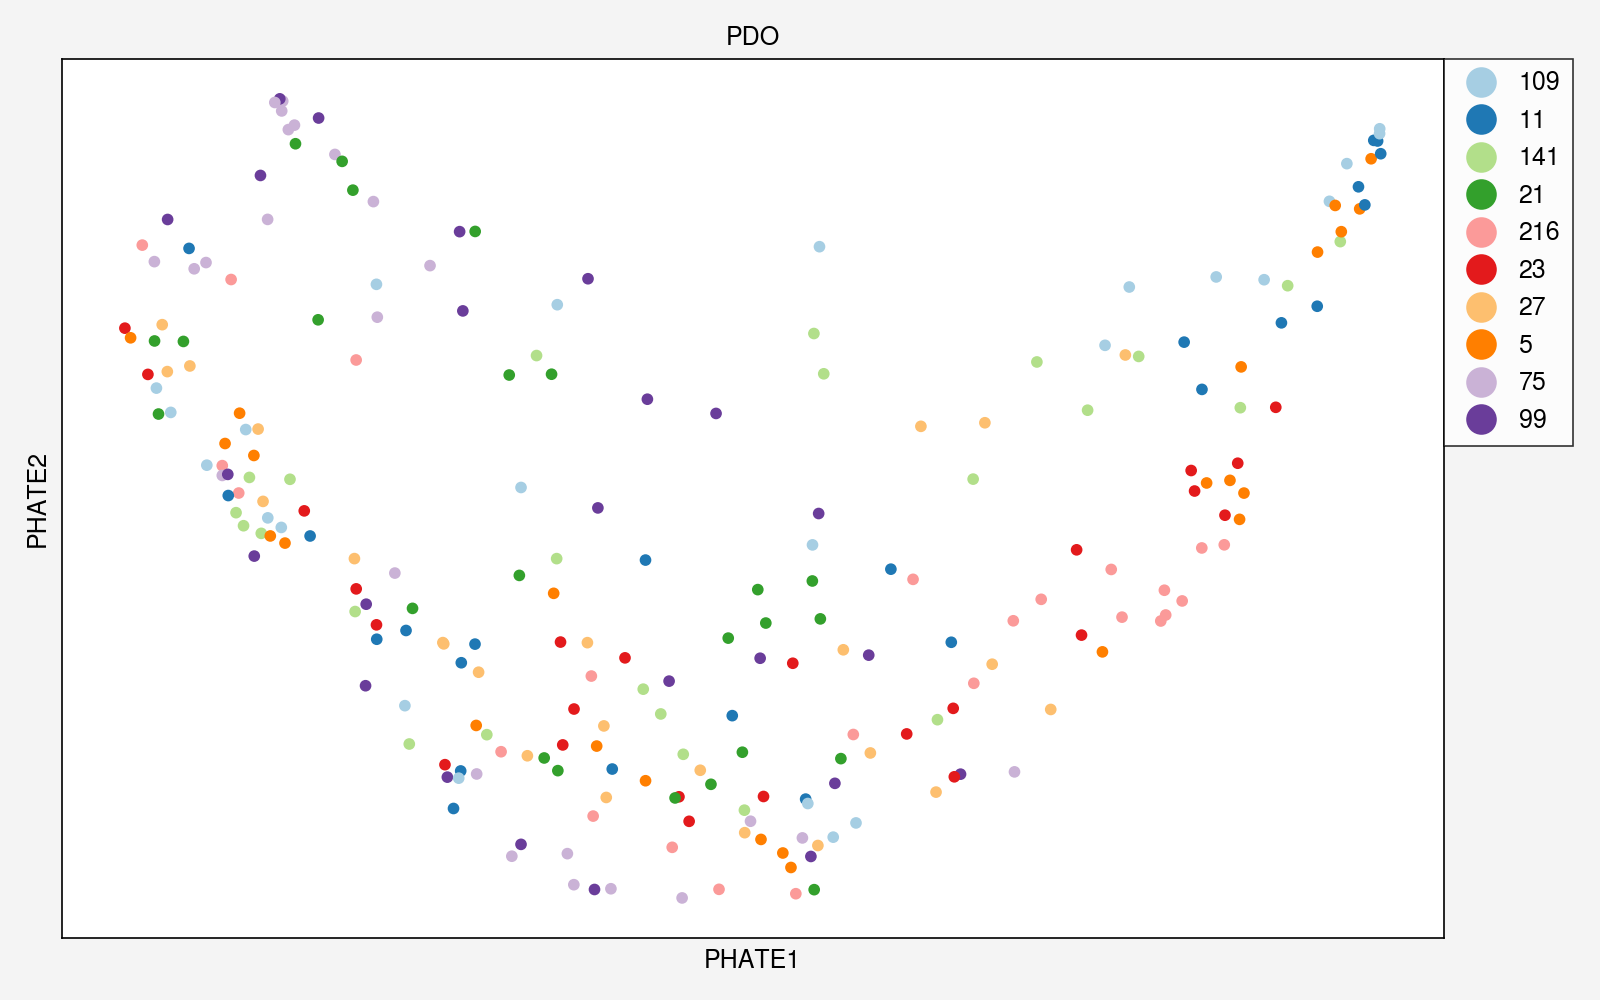

In [23]:
phate_op = phate.PHATE(t=18, knn=20,random_state=13, mds_solver="smacof", verbose=True)

data_phate = phate_op.fit_transform(data)
data_phate = pd.DataFrame(data_phate, index=data.index)

scprep.plot.scatter2d(data_phate, c=cocul_emd_df['Patient'], cmap='Paired',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(8,5), title='PDO')

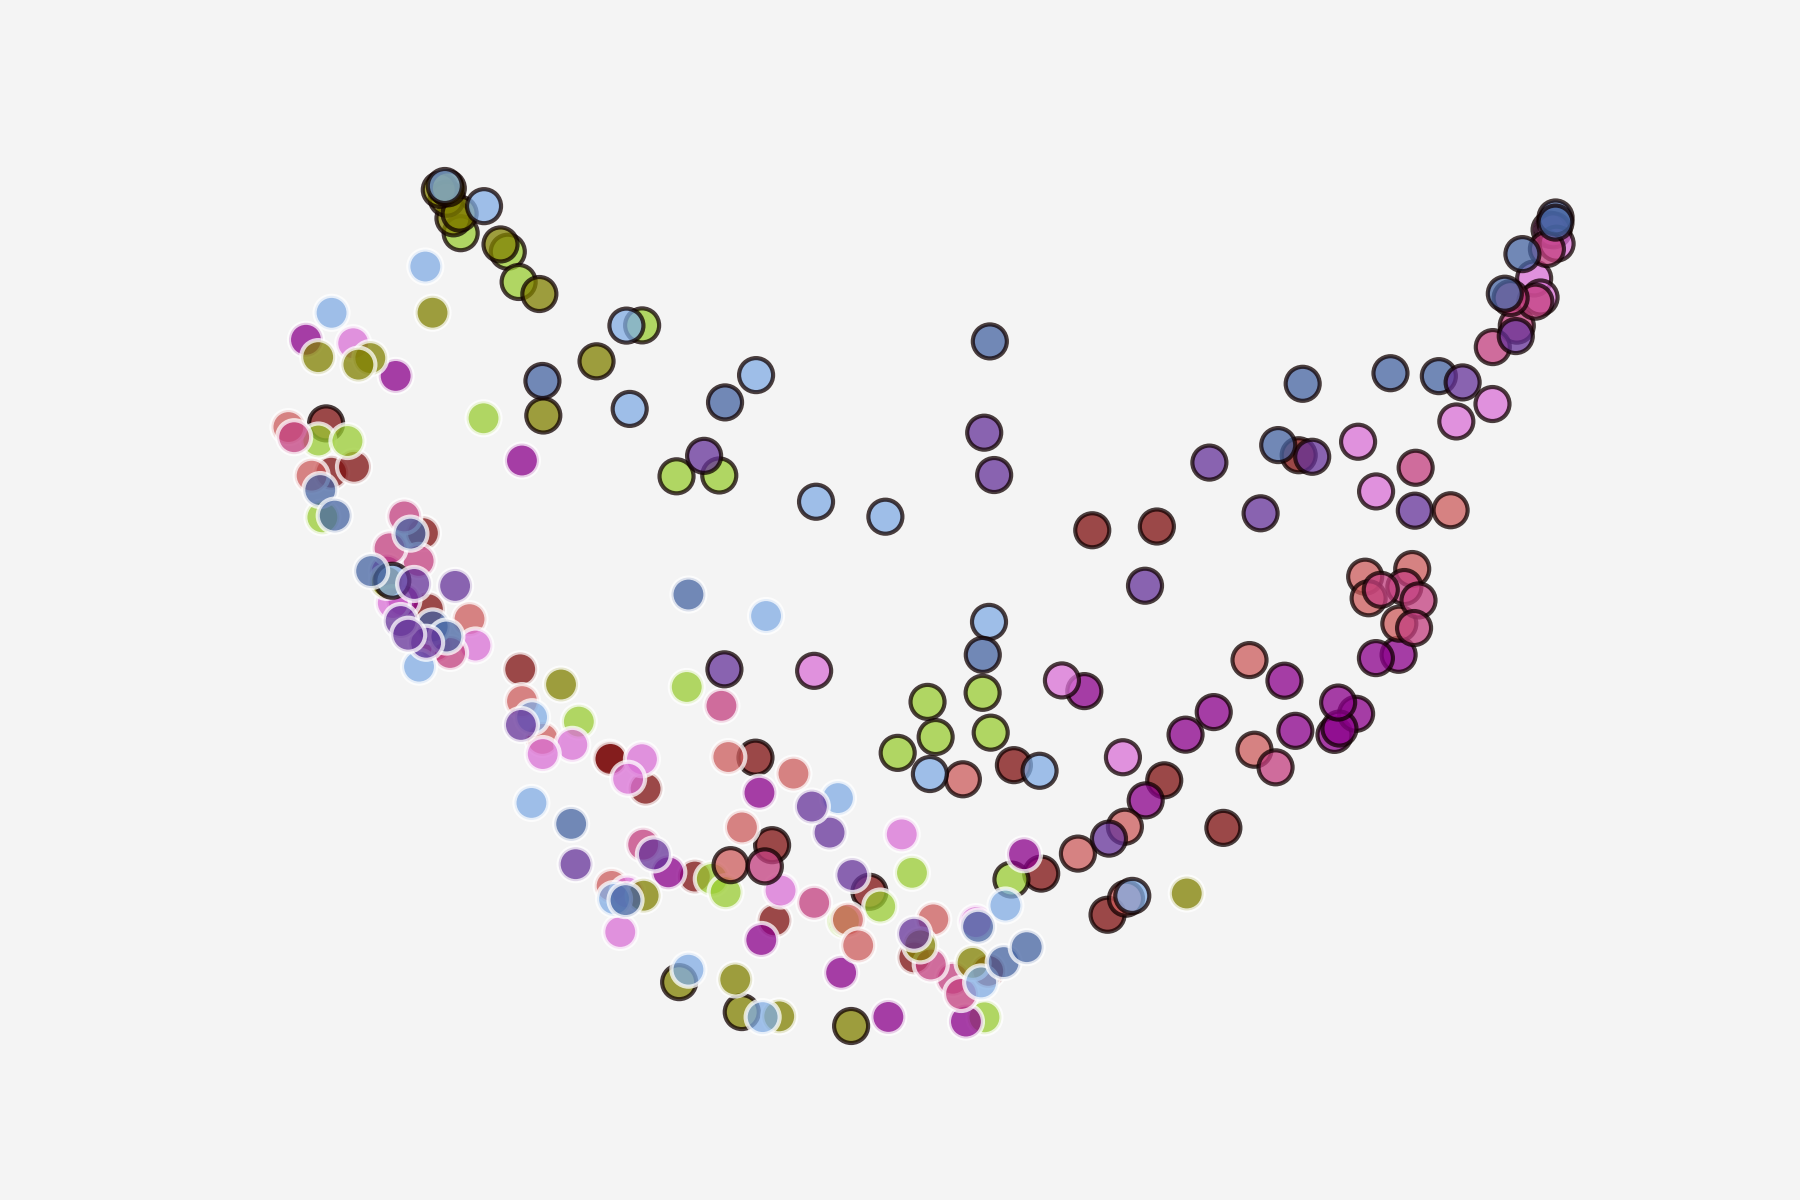

In [24]:
import matplotlib
x=data_phate.iloc[:,0]
y=data_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(9,6))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#100000', 'BM':'#FFFFFF'}
culture = {'PDOgd':'none', 'gd':'#000000'}

plt.scatter(x, y,s=150,alpha=0.75, c=cocul_emd_df['Patient'].map(patient), edgecolors=cocul_emd_df['Treatment'].map(treatment), linewidths=1.5)
plt.axis('off')
plt.show()

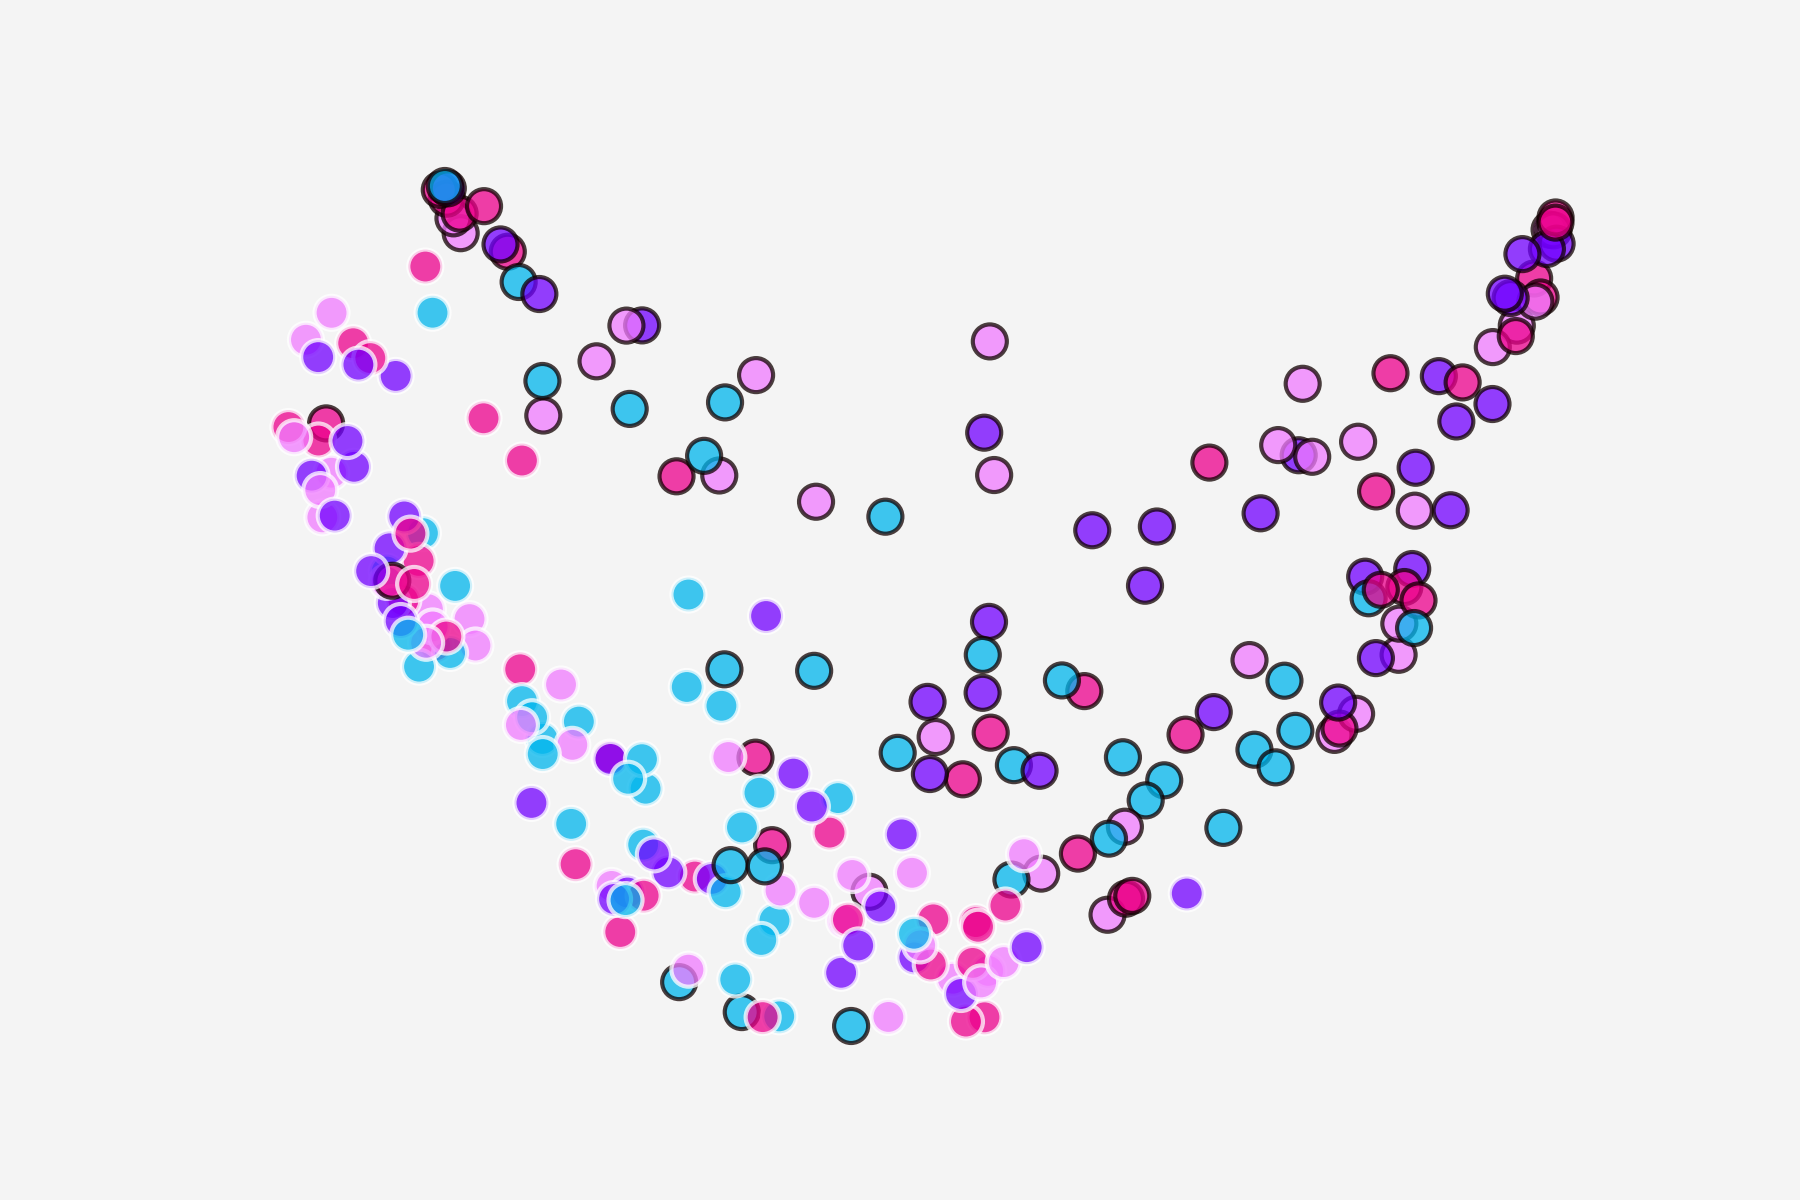

In [25]:
import matplotlib
x=data_phate.iloc[:,0]
y=data_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(9,6))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#100000', 'BM':'#FFFFFF'}
culture = {'PDOgd':'none', 'gd':'#000000'}
donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','E':'#00B6ED'}

plt.scatter(x, y,s=150,alpha=0.75, c=cocul_emd_df['gd_donor'].map(donor), edgecolors=cocul_emd_df['Treatment'].map(treatment), linewidths=1.5)
plt.axis('off')
plt.show()

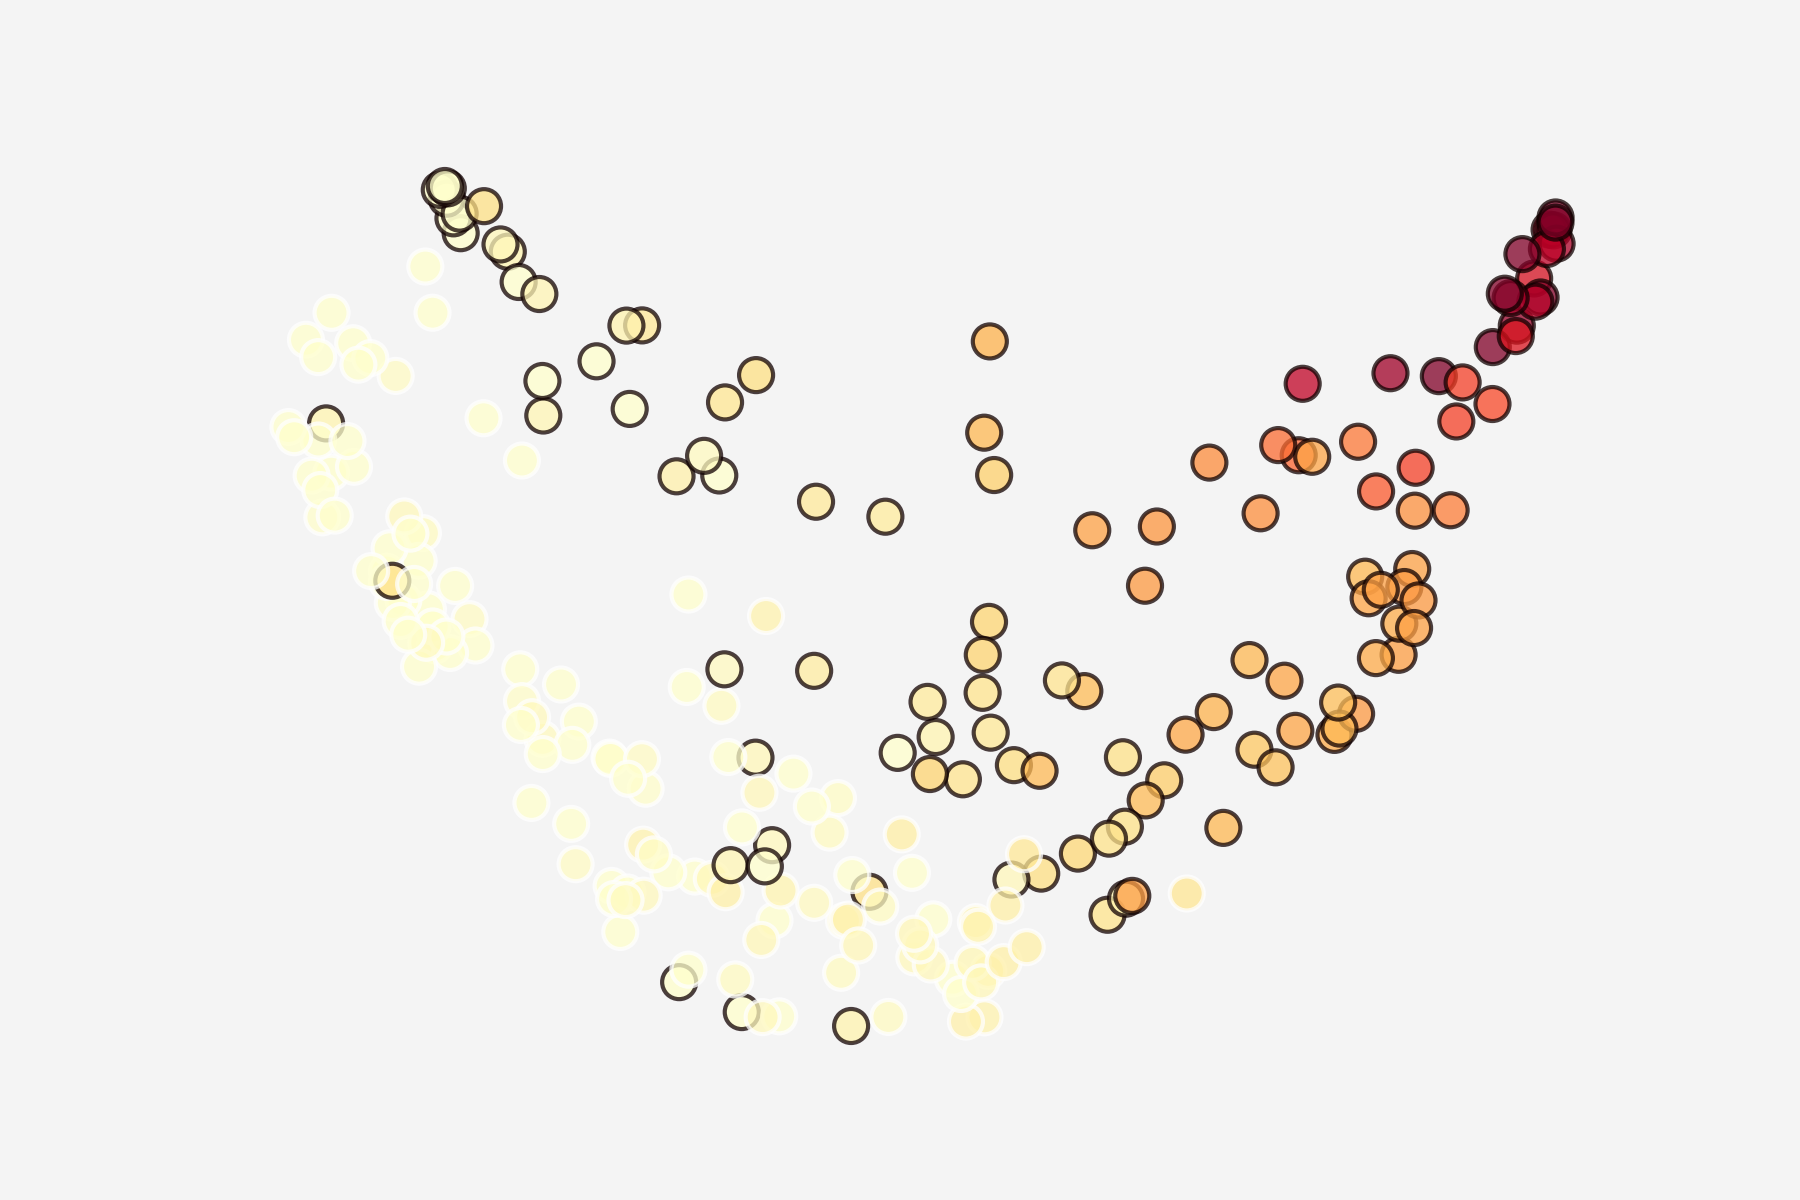

In [26]:
import matplotlib
x=data_phate.iloc[:,0]
y=data_phate.iloc[:,1]

fig, ax = plt.subplots(1, figsize=(9,6))
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

patient = {'5':'#C33F7F','11':'#DA70D6','21':'#9ACD32','23':'#CD5C5C','27':'#7D0F0F','75':'#808000','99':'#81ADE4','109':'#4564A2','141':'#663399','216':'#8B008B','X':'#A9A9A9'}    
treatment = {'B7C18':'#100000', 'BM':'#FFFFFF'}
culture = {'PDOgd':'none', 'gd':'#000000'}
donor = {'7':'#F17BFF', 'A':'#EC008C','B':'#7100FF','E':'#00B6ED'}
colormap=plt.cm.YlOrRd

plt.scatter(x, y,s=150,alpha=0.75, c=cocul_emd_df['GranzymeB'],cmap=colormap, edgecolors=cocul_emd_df['Treatment'].map(treatment), linewidths=1.5, vmin=0, vmax=0.7)
plt.axis('off')
plt.show()

In [29]:
cocul_emds_Tr=cocul_emd_df.loc[(cocul_emd_df['Treatment'].isin(['B7C18']))].groupby(
    [         
         "Patient",
        "gd_donor",
        "Replicate"
    ]
,as_index=True).mean().drop(
    [
    'GFP'
    ]
,axis=1, inplace=False)

cocul_emds_PTM_all = cocul_emds_Tr.filter(['pZAP_Syk', 'pSLP76','pSTAT3','pSTAT5','pNFkB','pERK'])
cocul_emds_GranB_IdU = cocul_emds_Tr.filter(['IdU', 'GranzymeB',])


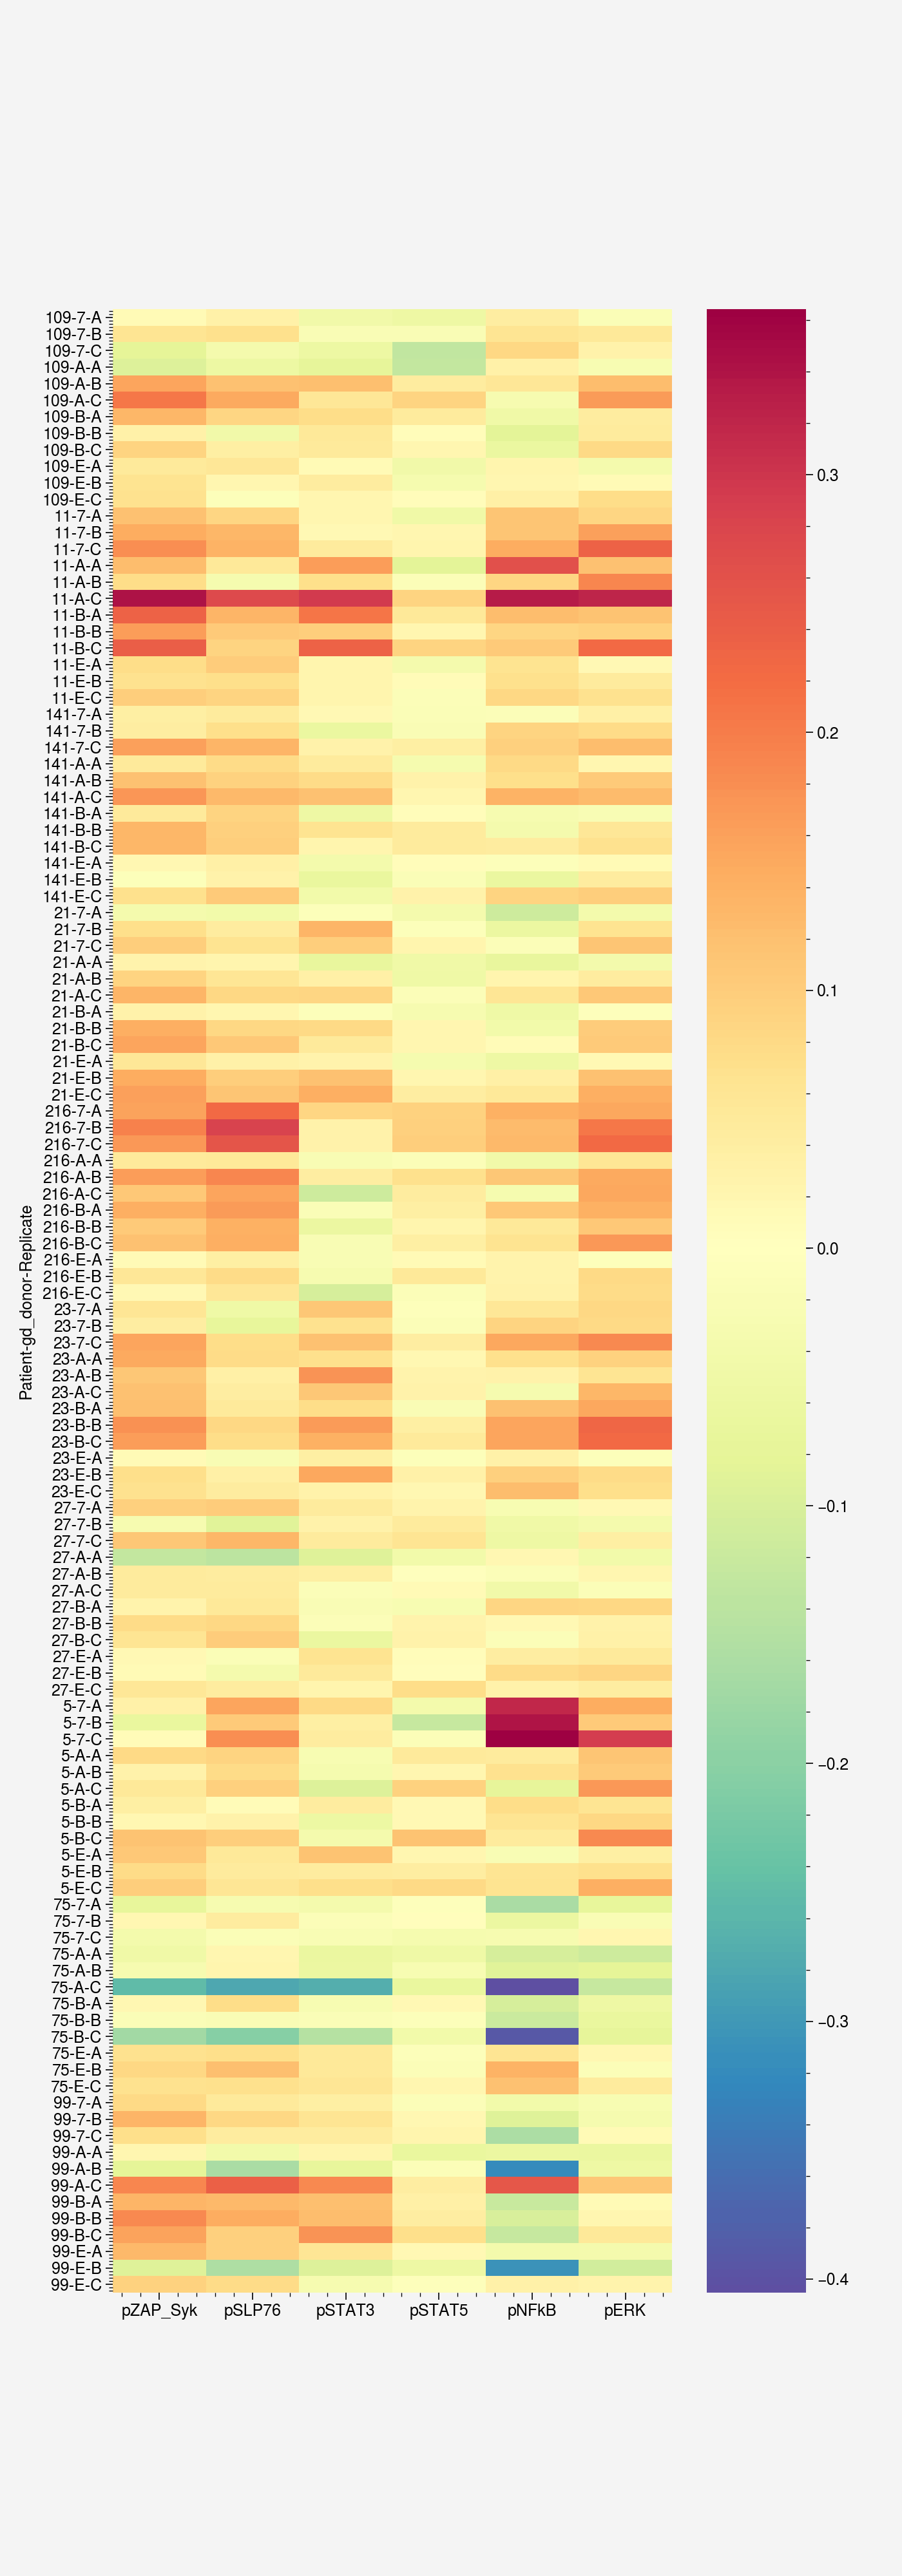

In [30]:
fig, ax = plt.subplots(figsize=(7, 20))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0)
seaborn.heatmap(cocul_emds_PTM_all, cmap=colormap,norm=offset)

plt.show()

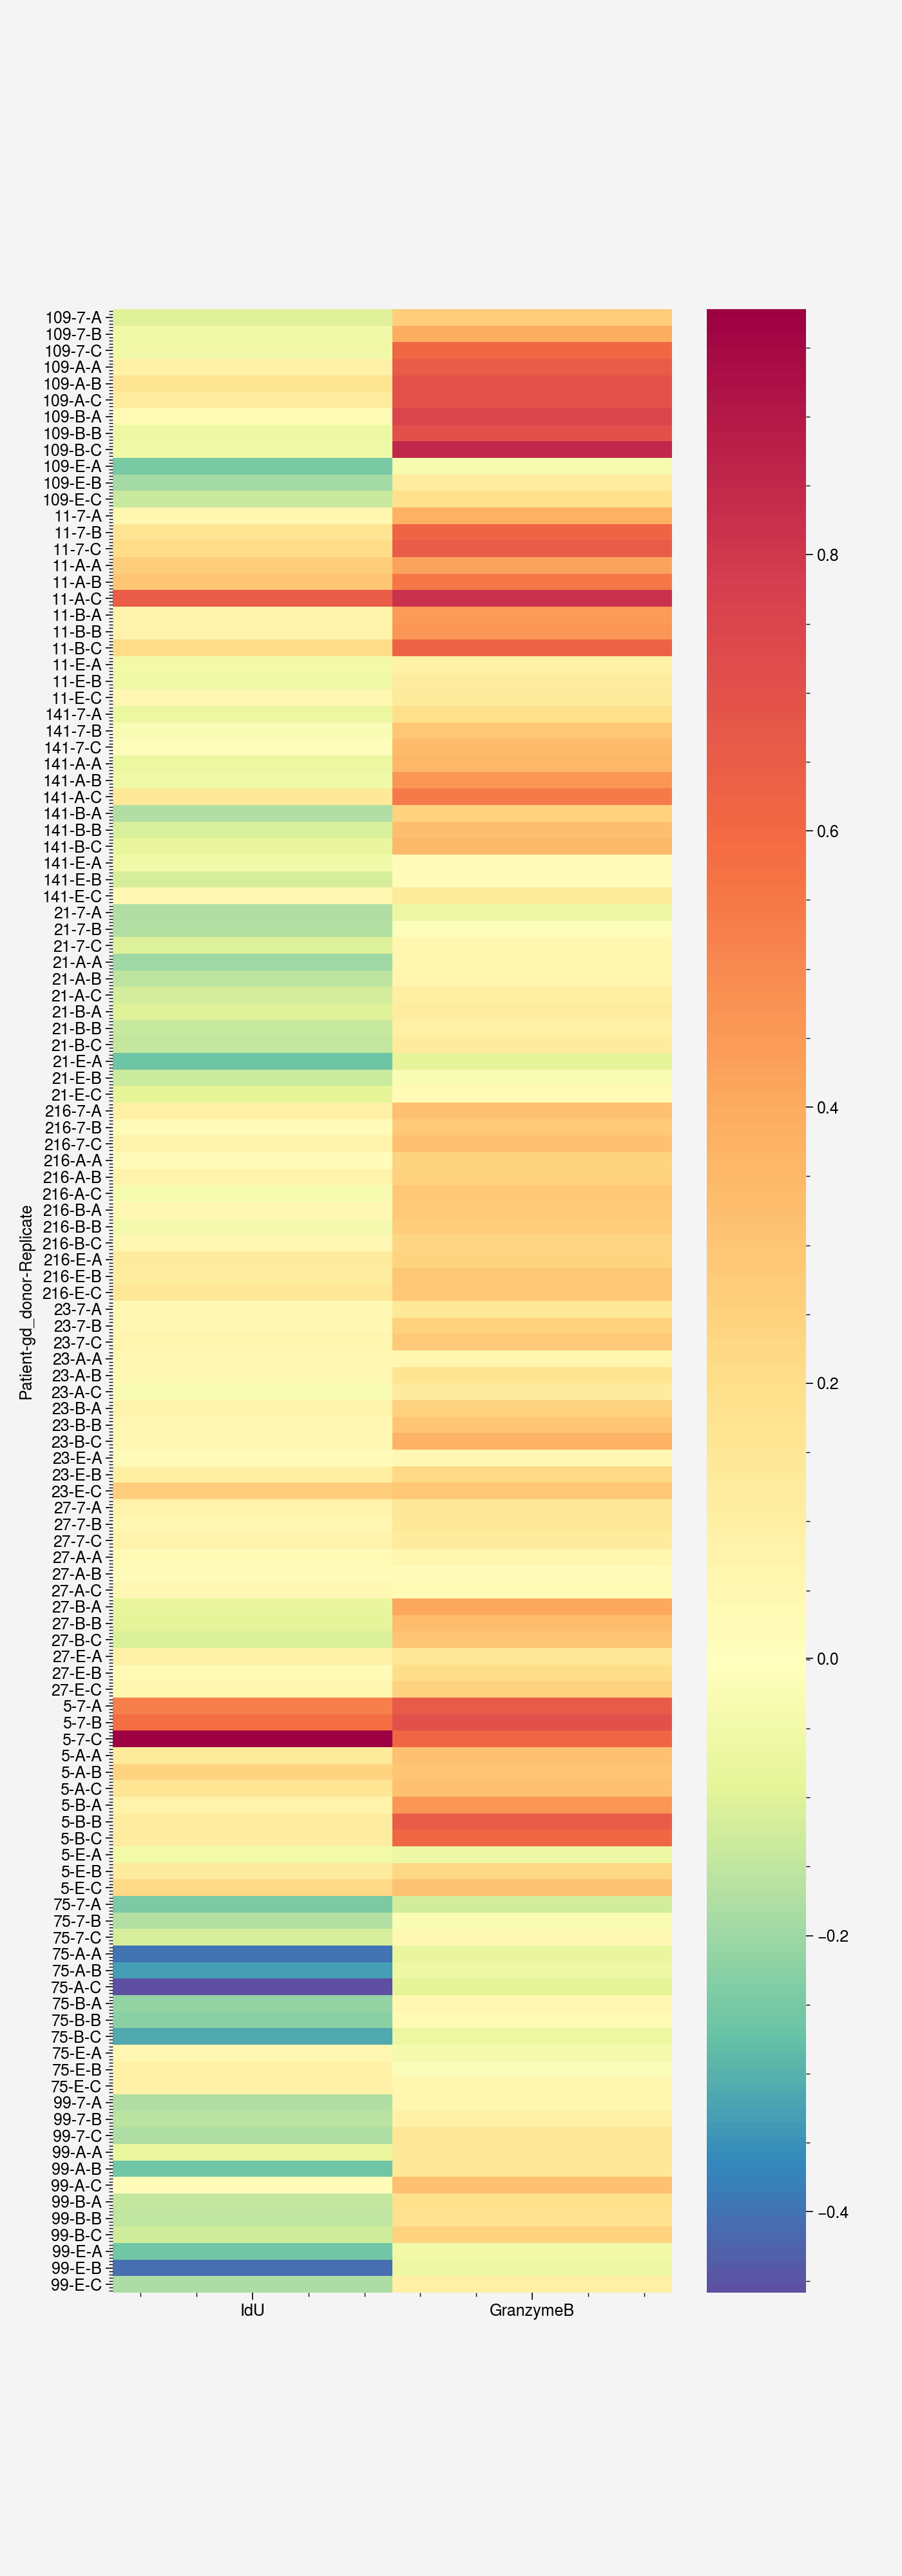

In [31]:
fig, ax = plt.subplots(figsize=(7, 20))
colormap=pplt.Colormap('Spectral_r')
offset = mcolors.TwoSlopeNorm(vcenter=-0)
seaborn.heatmap(cocul_emds_GranB_IdU, cmap=colormap,norm=offset)

plt.show()